In [25]:
print('importing packages')
import pandas as pd
import numpy as np
from pylab import *
import seaborn as sns
import warnings
import datetime
import keras.models as km
import keras.utils as ku
import keras.layers as kl
from keras.optimizers import RMSprop
warnings.simplefilter('ignore')
import textblob as tb

sns.set(color_codes=True)
#%matplotlib inline

import glob
files=glob.glob("*")


my_text_file = 'laurentextsjuly3.txt


#this section won't run if the data has already been cleaned
if files.count("clean_frame.csv") == 0:

    print('loading data')
    #import data
    filetable = pd.read_csv(my_text_file,sep='\t',names = ['date','time','inout','number','contact','text'])

    print('cleaning data')
    #take the data we actually care about
    data = filetable[['date','time','inout','text']]

    print('converting time to float')
    #I want to convert the times from strings to floats and remove seconds
    data['time'] = data['time'].str[:-3]
    data['time'] = data['time'].str.replace(":",".")
    data[['time']] = data[['time']].apply(pd.to_numeric)

    print('converting date to int')
    #I should convert date to number of days since our first text
    datenum=0 
    date = data.date[0]
    for i in range(len(data.date)):

        if data.date[i] != date:
            datenum+=1
            date = data.date[i]
            print(i,datenum)
        data.date[i] = datenum
    data.date

    #save the cleaned frame since cleaning it takes a while
    data.to_csv("clean_frame.csv")
else:
    print("Data has already been cleaned, moving on")
data.head(15)


importing packages
Data has already been cleaned, moving on


,Unnamed: 0,date,time,inout,text
0,0,0,2.09,out,It is Liam
1,1,0,2.16,in,Hey
2,2,0,2.16,in,Hey hey
3,3,0,2.51,out,"Hey it was nice to meet you, I had a great tim..."
4,4,0,2.51,in,Yeah! I had a great time too:)
5,5,0,2.52,in,Hope you have a good sleep :)
6,6,0,2.54,out,Haha it will be short but hopefully intense
7,7,0,3.01,in,Hopefully
8,8,0,3.01,in,Sorry for keeping you out so late !
9,9,0,3.02,out,LOL no it's ok I was having a good time


In [26]:
#load the cleaned frame
data = pd.read_csv('clean_frame.csv')
#load the full table as well jsut incase I'm interested later
originaldata = pd.read_csv('laurentextsjuly3.txt',sep='\t',names = ['date','time','inout','number','contact','text'])


def get_sentiment_dates(data):
    """A functinoto count the number of times a word or phrase (and its variants, or list of words) were stated,
    both in total and by the sender and reciever"""
    sentiments=[]
    dates = []
    insentiments=[]
    indates=[]
    outsentiments=[]
    outdates=[]
    for i in range(len(data.text)):
        
        sentiments.append(tb.TextBlob(data.text[i]).sentiment.polarity)
        if data.inout[i] == 'in': insentiments.append(tb.TextBlob(data.text[i]).sentiment.polarity)
        if data.inout[i] =='out':outsentiments.append(tb.TextBlob(data.text[i]).sentiment.polarity)
    return sentiments,insentiments,outsentiments,


setiments,insentiments,outsentiments = get_sentiment_dates(data)
dailysentiments = []
dailyinsentiments=[]
dailyoutsentiments=[]
day = data.date[0]
sent=0
numsent = 0
for i in range(len(fullsentiments)):  
    if day == data.date[i]:
        #add that text to one big text
        sent+=fullsentiments[i]
        numsent+=1      
    #if it has a different incoming/outgoing value
    if day != data.date[i]:
        #add the older big text to the list (as well as teh other stuff)
        dailysentiments.append(sent/numsent)
        #if data.inout[i-1] == 'in': dailyinsentiments.append(sent/numsent)
        #if data.inout[i-1] == 'out':dailyoutsentiments.append(sent/numsent)
        #and reset the stte variables
        sent=0
        numsent = 0
        sent+=sentiments[i]
        numsent+=1
        day = data.date[i]
    


    

#This cell will compute and print a bunch of stats
def get_word_dates(wordList):
    """A functinoto count the number of times a word or phrase (and its variants, or list of words) were stated,
    both in total and by the sender and reciever"""
    fullcount=[]
    incount=[]
    outcount=[]
    for word in range(len(wordList)):
        for i in range(len(data.text)):
            if wordList[word] in data.text[i]:
                fullcount.append(data.date[i])
                if data.inout[i] == 'in': incount.append(data.date[i])
                if data.inout[i] =='out':outcount.append(data.date[i])
    return fullcount,incount,outcount



#The hour we text the most
if data.time.round().mode()[0] > 12 : print("The hour we text the most is " + str(int(data.time.round().mode()[0]-12))+" PM")
if data.time.round().mode()[0] <= 12 : print("The hour we text the most is " + str(int(data.time.round().mode()[0]))+" AM")
print("\n")
#% of texts coming from lauren
print('#,% of texts from Her: ' +str(data.inout[data.inout == 'in'].count())+", " +str(100*data.inout[data.inout == 'in'].count()/data.inout.count()) + '%')
print('#,% of texts from Me : ' +str(data.inout[data.inout == 'out'].count())+", " + str(100 - 100*data.inout[data.inout == 'in'].count()/data.inout.count()) + '%')
print("\n")
#number of times different words and phrases were said
lovedate,loveindate,loveoutdate = get_word_dates(['love you', 'Love you', 'love You', 'Love You','luv you', 'Luv you', 'luv You','luv u','luv U'])          
print("Number of times I love you was said: "+ str(len(lovedate)))
print("Number of times she said I love you : "+ str(len(loveindate)))
print("Number of times I said I love you: "+ str(len(loveoutdate)))
print("\n")
babydate,babyindate,babyoutdate = get_word_dates(['baby', 'Baby', 'Baybay', 'baybay'])         
print("Number of times baby was said: "+ str(len(babydate)))
print("Number of times she said baby : "+ str(len(babyindate)))
print("Number of times I said baby: "+ str(len(babyoutdate)))
print("\n")
gndate,gnindate,gnoutdate = get_word_dates(['goodnight', 'good night', 'good Night', 'Good night','Goodnight','Good Night','night','Night'])         
print("Number of times goodnight was said: "+ str(len(gndate)))
print("Number of times she said goodnight : "+ str(len(gnindate)))
print("Number of times I said goodnight: "+ str(len(gnoutdate)))
print("\n")
smiledate,smileindate,smileoutdate = get_word_dates([':)'])         
print("Number of times :) was said: "+ str(len(smiledate)))
print("Number of times she said :) : "+ str(len(smileindate)))
print("Number of times I said :): "+ str(len(smileoutdate)))
print("\n")
fuckdate,fuckindate,fuckoutdate = get_word_dates(['fuck','Fuck','FUCK'])         
print("Number of times fuck was said: "+ str(len(fuckdate)))
print("Number of times she said fuck : "+ str(len(fuckindate)))
print("Number of times I said fuck: "+ str(len(fuckoutdate)))
print("\n")
heydate,heyindate,heyoutdate = get_word_dates(['hey','Hey','HEY','HEy','hEY'])         
print("Number of times hey was said: "+ str(len(heydate)))
print("Number of times she said hey : "+ str(len(heyindate)))
print("Number of times I said hey: "+ str(len(heyoutdate)))
print("\n")
okaydate,okayindate,okayoutdate = get_word_dates(['okay','Okay','ok','Ok'])         
print("Number of times okay was said: "+ str(len(okaydate)))
print("Number of times she said okay : "+ str(len(okayindate)))
print("Number of times I said okay: "+ str(len(okayoutdate)))
print("\n")
whateverdate,whateverindate,whateveroutdate = get_word_dates(['whatever','whatever','whtvr','Whtvr','whtever','Whtever','wtever','Wtever'])         
print("Number of times whatever was said: "+ str(len(whateverdate)))
print("Number of times she said whatever : "+ str(len(whateverindate)))
print("Number of times I said whatever: "+ str(len(whateveroutdate)))



The hour we text the most is 6 PM


#,% of texts from Her: 14197, 53.64849034501001%
#,% of texts from Me : 12266, 46.35150965498999%


Number of times I love you was said: 34
Number of times she said I love you : 10
Number of times I said I love you: 24


Number of times baby was said: 2145
Number of times she said baby : 800
Number of times I said baby: 1345


Number of times goodnight was said: 921
Number of times she said goodnight : 347
Number of times I said goodnight: 574


Number of times :) was said: 1258
Number of times she said :) : 643
Number of times I said :): 615


Number of times fuck was said: 929
Number of times she said fuck : 382
Number of times I said fuck: 547


Number of times hey was said: 1064
Number of times she said hey : 594
Number of times I said hey: 470


Number of times okay was said: 3507
Number of times she said okay : 1926
Number of times I said okay: 1581


Number of times whatever was said: 160
Number of times she said whatever : 110
Number of times

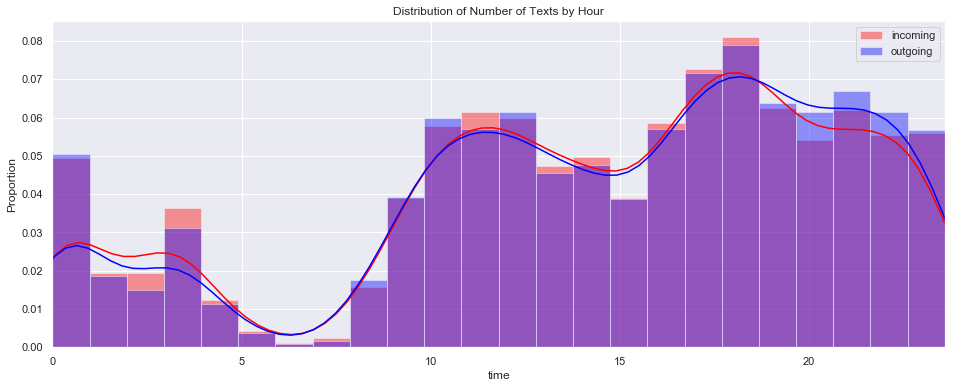

In [39]:
#histogram of distributions of when we text each other
figure(figsize=(16,6))
title("Distribution of Number of Texts by Hour")
xlabel("Hour (Midnight to 11PM)")
ylabel("Proportion")
xlim(0,23.6)
#sns.distplot(data[['time']], kde = True,bins = 24)
sns.distplot(data.time[data.inout == 'in'], kde = True,bins = 24,color = 'red')
sns.distplot(data.time[data.inout == 'out'], kde = True,bins = 24,color = 'blue')
legend(['incoming','outgoing'])


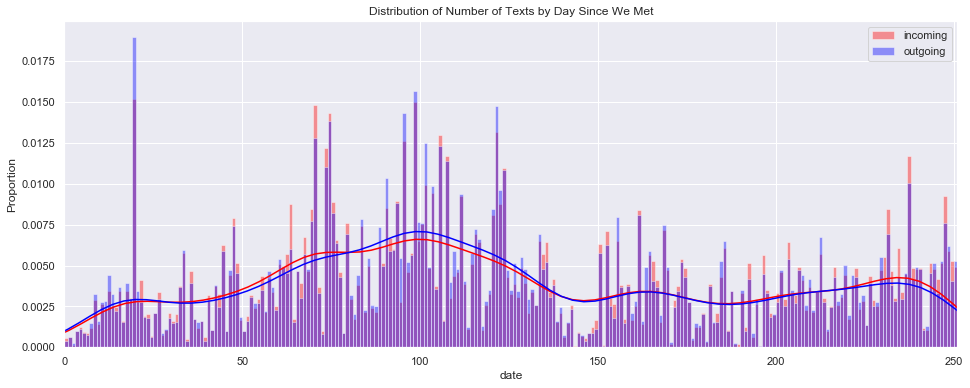

In [31]:
#histogram of distributions of when we text each other
figure(figsize=(16,6))
title("Distribution of Number of Texts by Day Since We Met")
xlabel("Day Since We Met")
ylabel("Proportion")
xlim(0,data['date'][len(data.date)-1])
#sns.distplot(data[['date']], kde = True,bins = data['date'][len(data.date)-1])
sns.distplot(data.date[data.inout == 'in'], kde = True,bins = data['date'][len(data.date)-1],color = 'red')
sns.distplot(data.date[data.inout== 'out'], kde = True,bins = data['date'][len(data.date)-1],color = 'blue')
legend(['incoming','outgoing'])
#Halloween is the highest for some reason

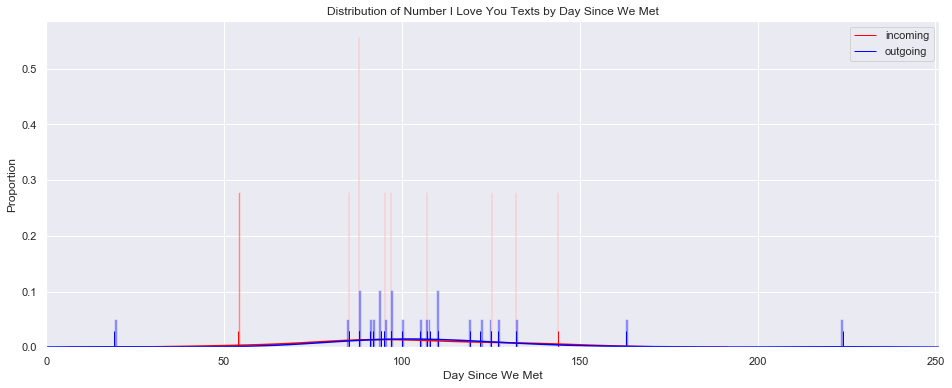

In [37]:
#histogram of distributions of when we text each other
figure(figsize=(16,6))
title("Distribution of Number I Love You Texts by Day Since We Met")
xlabel("Day Since We Met")
ylabel("Proportion")
xlim(0,data['date'][len(data.date)-1])
#sns.distplot(lovedate, kde = True,bins = data['date'][len(data.date)-1])
sns.distplot(loveindate, kde = True,bins = data['date'][len(data.date)-1],color='red',norm_hist=False)
sns.distplot(loveoutdate, kde = True,bins = data['date'][len(data.date)-1],color='blue',norm_hist=False)
legend(['incoming','outgoing'])
#Guess I'm needy

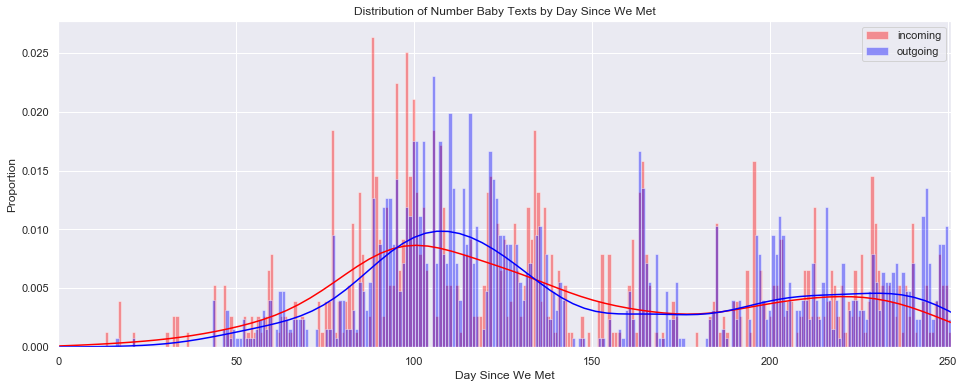

In [34]:
#histogram of distributions of when we text each other
figure(figsize=(16,6))
title("Distribution of Number Baby Texts by Day Since We Met")
xlabel("Day Since We Met")
ylabel("Proportion")
xlim(0,data['date'][len(data.date)-1])
#sns.distplot(babydate, kde = True,bins = data['date'][len(data.date)-1])
sns.distplot(babyindate, kde = True,bins = data['date'][len(data.date)-1],color='red')
sns.distplot(babyoutdate, kde = True,bins = data['date'][len(data.date)-1],color='blue')
legend(['incoming','outgoing'])

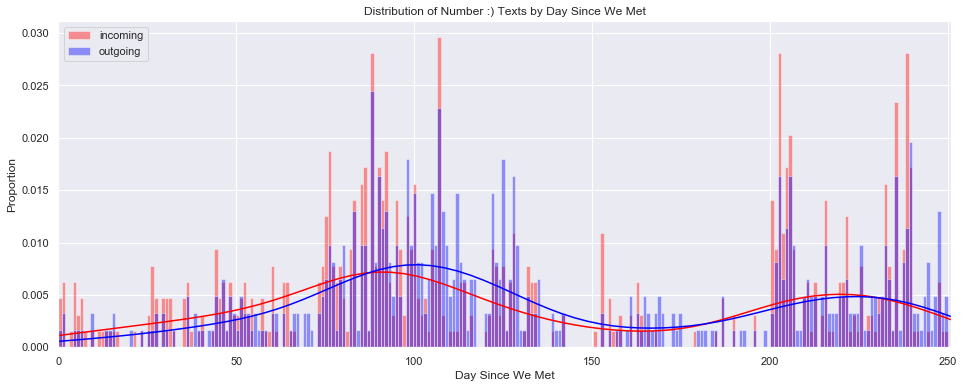

In [14]:
#histogram of distributions of when we text each other
figure(figsize=(16,6))
title("Distribution of Number :) Texts by Day Since We Met")
xlabel("Day Since We Met")
ylabel("Proportion")
xlim(0,data['date'][len(data.date)-1])
#sns.distplot(babydate, kde = True,bins = data['date'][len(data.date)-1])
sns.distplot(smileindate, kde = True,bins = data['date'][len(data.date)-1],color='red')
sns.distplot(smileoutdate, kde = True,bins = data['date'][len(data.date)-1],color='blue')
legend(['incoming','outgoing'])

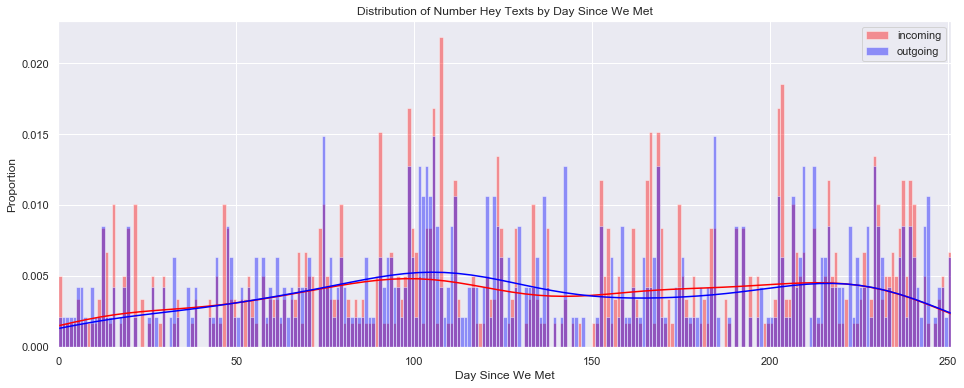

In [40]:
#histogram of distributions of when we text each other
figure(figsize=(16,6))
title("Distribution of Number Hey Texts by Day Since We Met")
xlabel("Day Since We Met")
ylabel("Proportion")
xlim(0,data['date'][len(data.date)-1])
#sns.distplot(babydate, kde = True,bins = data['date'][len(data.date)-1])
sns.distplot(heyindate, kde = True,bins = data['date'][len(data.date)-1],color='red')
sns.distplot(heyoutdate, kde = True,bins = data['date'][len(data.date)-1],color='blue')
legend(['incoming','outgoing'])

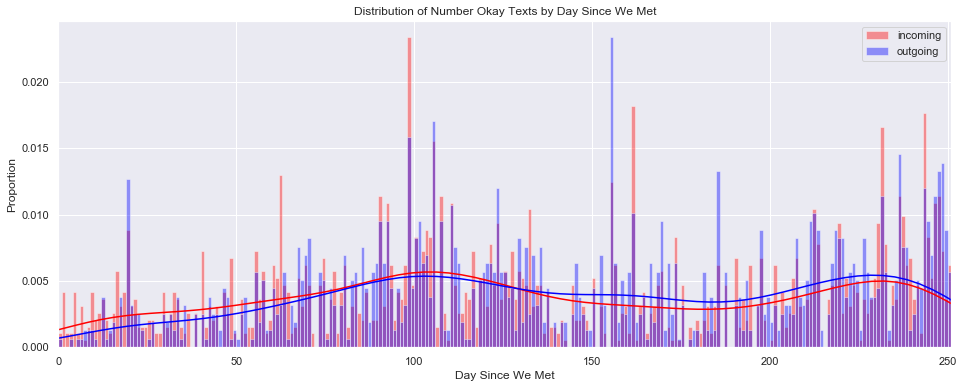

In [41]:
#histogram of distributions of when we text each other
figure(figsize=(16,6))
title("Distribution of Number Okay Texts by Day Since We Met")
xlabel("Day Since We Met")
ylabel("Proportion")
xlim(0,data['date'][len(data.date)-1])
#sns.distplot(babydate, kde = True,bins = data['date'][len(data.date)-1])
sns.distplot(okayindate, kde = True,bins = data['date'][len(data.date)-1],color='red')
sns.distplot(okayoutdate, kde = True,bins = data['date'][len(data.date)-1],color='blue')
legend(['incoming','outgoing'])

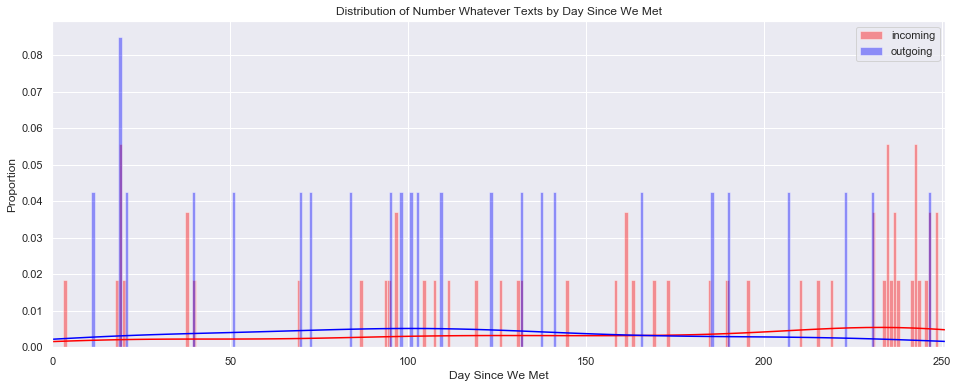

In [42]:
#histogram of distributions of when we text each other
figure(figsize=(16,6))
title("Distribution of Number Whatever Texts by Day Since We Met")
xlabel("Day Since We Met")
ylabel("Proportion")
xlim(0,data['date'][len(data.date)-1])
#sns.distplot(babydate, kde = True,bins = data['date'][len(data.date)-1])
sns.distplot(whateverindate, kde = True,bins = data['date'][len(data.date)-1],color='red')
sns.distplot(whateveroutdate, kde = True,bins = data['date'][len(data.date)-1],color='blue')
legend(['incoming','outgoing'])

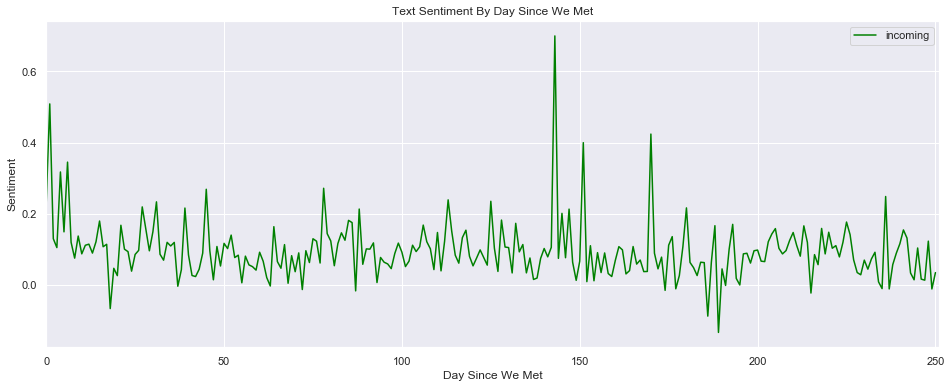

In [29]:
#histogram of distributions of when we text each other
figure(figsize=(16,6))
title("Text Sentiment By Day Since We Met")
xlabel("Day Since We Met")
ylabel("Sentiment")
xlim(0,data['date'][len(data.date)-1])
#sns.distplot(babydate, kde = True,bins = data['date'][len(data.date)-1])
#plot(dailyinsentiments, color='red')
#plot(dailyoutsentiments, color='blue')
plot(dailysentiments,color='green')
##sns.distplot(whateveroutdate, kde = True,bins = data['date'][len(data.date)-1],color='blue')
legend(['incoming','outgoing'])

In [48]:
#Ok time to start actually preparing to do some machine learning

#First, combine all the texts and generate a corpus
textstring = ""
for i in range(len(data.text)):
    textstring+=data.text[i]

#split the text string by space to get all the words, then sort unique words
corpus = textstring.split()
words = sorted(list(set(textstring.split())))
#number of ''unique'' words
num_words = len(words)
#assign an int to each word
encoding = {w: i for i, w in enumerate(words)}
decoding = {i: w for i, w in enumerate(words)}

#In the case of lil pump, the x data and y data was sentence_length words and the 1 word following it
#In this case, we instead want to train by TEXT and so we should no longer have a sentence length, but instead
# an incoming text as x data and an outgoing text as y data (now that I think about this my dataset for 
# my and lauren's texts is proably not even close to big enough, but let's see what happens anyway,
# we can always find more data)


#We introduce our first hyperparameter, the number of texts used as x data for each y data text
#We will simply start with 1 since this wil be fast to train and see how it does, perhaps increase it later.

numtexts = 1

#given the format of the texts, i will need to collapse each set of time-adjecent ingoing and outgoing texts into 1 
#(I cant think of a better way to separate multiple successive ingoing or outgoing texts)

#create a list to store the grouped texts
new_text_list=[]
#create a list to store the date of the final (why not) text of the grouping
new_date_list=[]
#create a list to store the final (why not) time of the text group
new_time_list=[]
#same thing for inout
new_inout_list = []
#string (binary) variable to tell us if the current grouping is incoming or outgoing
if data.inout[0] == 'out': inout = 'out'
else: inpout = 'in'
#variable to store the whole grouped text
bigtext=""


#loop over the data and group the texts into a new list
for i in range(len(data.text)):
    #if the text's incoing/outgoing value is the same as it was last text
    if inout == data.inout[i]:
        #add that text to one big text
        bigtext+=data.text[i] + " \n "
    #if it has a different incoming/outgoing value
    if inout != data.inout[i]:
        #add the older big text to the list (as well as teh other stuff)
        new_text_list.append(bigtext)
        new_date_list.append(data.date[i-1])
        new_time_list.append(data.time[i-1])
        new_inout_list.append(data.inout[i-1])
        #and reset the stte variables
        bigtext=""
        bigtext+=data.text[i] + " \n "
        inout = data.inout[i]
        
#this is good
dataCollapse = pd.DataFrame({'date':new_date_list,'time':new_time_list,'inout':new_inout_list,'text':new_text_list})





#the next cell is where the problems will begin, I actually can't figure out how I will do it any way other
# than one word at a time in the context of previous words


In [49]:
'''ok here is the version that is exactly like the recipe example'''
nwords=num_words
#get a bit of information on the max and mean size of texts in the dataframe
maxlength=0
meanlength = 0
for i in range(len(dataCollapse.text)):
    meanlength+=len(dataCollapse.text[i].split())
    if len(dataCollapse.text[i].split()) > maxlength:
               maxlength = len(dataCollapse.text[i].split())
            
#there is a large split in the length of texts, I'm not sure if it would be better to
#be closer to the mean length for the context length or closer to the max -- if we are close the te max then we get a TONNE of 
# context and it might be weird (and very slow), if we are closer to the mean then we may miss some
# important learning from large texts

#Let's jsut give the following a go:
sentencelen = 13

xdata = []; ydata = []

for i in range(len(corpus) - sentencelen):
    sentence = corpus[i: i + sentencelen]
    next_word = corpus[i + sentencelen]
    xdata.append([encoding[w] for w in sentence])
    ydata.append(encoding[next_word])
    
n_sentences = len(xdata)

#I get memory errors here, need a better computer :(
x = np.zeros((n_sentences, sentencelen, num_words), dtype = bool)
y = np.zeros((n_sentences, num_words), dtype = bool)

print(1)
for i, sentence in enumerate(xdata):
    for t, encoded_word in enumerate(sentence):
        x[i, t, encoded_word] = 1
        y[i, ydata[i]] = 1
                
model = km.Sequential()

model.add(kl.LSTM(128,input_shape = (sentencelen, num_words)))

model.add(kl.Dense(num_words, activation = 'softmax'))
#optimizer = RMSprop(lr=0.01) # ‘sgd’
optimizer='sgd'
model.compile(loss = 'categorical_crossentropy',optimizer = optimizer, metrics = ['accuracy'])

fit = model.fit(x, y, epochs = 1,batch_size = 5, verbose = 2)
model.save('50epoch_model_long_sentence.h5')

MemoryError: 

In [ ]:
''' Ok here is the verison where I train outgoing texts on the past context_length words  and generate 1 word at a time.
ok EVEN this doesnt really work since i cant jump to outgoing in the corpus unless
I have some marker in there which I guess I could put in there but dont really want to '''


#get a bit of information on the max and mean size of texts in the dataframe
maxlength=0
meanlength = 0
for i in range(len(dataCollapse.text)):
    meanlength+=len(dataCollapse.text[i].split())
    if len(dataCollapse.text[i].split()) > maxlength:
               maxlength = len(dataCollapse.text[i].split())
            
#there is a large split in the length of texts, I'm not sure if it would be better to
#be closer to the mean length for the context length or closer to the max -- if we are close the te max then we get a TONNE of 
# context and it might be weird (and very slow), if we are closer to the mean then we may miss some
# important learning from large texts

#Let's jsut give the following a go:
sentencelen = int(meanlength)

#length of the incoming text we train the next word on, and therefore the length of the outgoing text
#save the x data and y data in pairs
xdata = []; ydata = []

#skip to an outgoing text and save the context_length words before it as x and the next word as y
for i in range(len(corpus) - sentencelen-1):
    if dataCollapse.inout[i] == 'out':
        sentence = corpus[i-sentencelen: i]
        next_word = corpus[i]
        xdata.append([encoding[w] for w in sentence])
        ydata.append(encoding[next_word])
    else:
        sentence = corpus[i-sentencelen: i]
        next_word = corpus[i]
        xdata.append([encoding[w] for w in sentence])
        ydata.append(encoding['i'])

n_sentences = len(xdata)
x = np.zeros((n_sentences, sentencelen, nwords), dtype = bool)
y = np.zeros((n_sentences, nwords), dtype = bool)


for i, sentence in enumerate(xdata):
    for t, encoded_word in enumerate(sentence):
        x[i, t, encoded_word] = 1
        y[i, ydata[i]] = 1

In [ ]:
'''OK HERE IS THE VERSION WHERE I TRY TO MAKE INCOMING X DATA AND OUTGOING Y DATA, IT DOESNT WORK BECAUSE THE INPUT SIZE
CHANGES WITH EVERY DATA POINT'''




#save the x data and y data in pairs
xdata = []; ydata = []

#I want the x data to be a list of the words in the previous text and the y data to be a list of the words in the next text
# |NOTE: THE WAY IT IS DONE HERE IT IS TRAINING ALL TEXTS ON ALL TEXTS, IT IS NOT TRAINING OUTGOING TEXTS ON INCOMING TEXTS,
#                IT WOULD BE INTERESTING TO SEE IT BOTH WAYS, BUT ACTUALLY I THINK WHAT I WANT MOST IS TO TRAIN OUTGOING
#                TEXTS ON INCOMING TEXTS -- another option is to make the data multidimemsional, include incoming 
#                r outgoing as a feature and then I can predict her response or my response based on that
#####for i in range(len(dataCollapse) - numtexts):
######    #x data text is a split of the text
######    text = dataCollapse.text[i].split()
######    next_text = dataCollapse.text[i+numtexts].split()
######    xdata.append([encoding[w] for w in text])
######    ydata.append([encoding[z] for z in next_text])

#I've decided to do it here such that it trains outgoing texts on incoming texts only,
# just for simplicity and that is my favourite version, though there would also be utility in knowing what she would say
# given an outgoing text I send her

for i in range(len(dataCollapse) - numtexts):
    #we're going to train outgoing texts on incoming texts, that is, incoming texts are x data, outgoing texts are ydata
    #move to an incoming text and save it as x data, the next (outgoing in this construction) text is savd as y data
    if dataCollapse.inout[i] == 'out':
        text = dataCollapse.text[i].split()
        next_text = dataCollapse.text[i+numtexts].split()
        xdata.append([encoding[w] for w in text])
        ydata.append([encoding[z] for z in next_text])
        
#this saves as pairs [x = incoming,y = next outgoing] - i can train on this
#I can ALSO train on [next outgoing -1, incoming] -- i can train on this to predict her response given my outgoing text
#NOTE, I CAN ALSO TRAIN INCOMING ON OUTGOING BY TRAINING Y ON X-1 (or some shift, not going to think about it right now)
    
n_incoming = len(xdata)
n_outgoing = len(ydata)

#
x = np.zeros((n_sentences, sentencelen, nwords), dtype = bool)
y = np.zeros((n_sentences, nwords), dtype = bool)


for i, sentence in enumerate(xdata):
    for t, encoded_word in enumerate(sentence):
        x[i, t, encoded_word] = 1
        y[i, ydata[i]] = 1
        

        
#LSTM to learn text responses

model = km.Sequential()

#my input shape will be different for each 
model.add(kl.LSTM(128,input_shape = (numtexts, num_words)))

model.add(kl.Dense(num_words, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'sgd', metrics = ['accuracy'])

fit = model.fit(xdata, ydata, epochs = 50,batch_size = 128, verbose = 2)
model.save('50epoch_model_long_sentence.h5')
        

In [47]:
##Aside: a function to generate a random text from the corpus
import numpy.random
def gen_random_text(corpus,text_length):
    nums = numpy.random.randint(0,len(corpus),text_length)
    string =""
    for i in range(text_length):
        string+=corpus[nums[i]] + " "
    return string

for i in range(0,20):
    new_text = gen_random_text(corpus,numpy.random.randint(3,15))
    print(new_text + "\n")
    

bad. gg hat's rain you seem 

shit?Honestly Did gym at anythingWhat's Oh last itYeah it restaurant wanna 

woke "you song I'll nothingYeah thing SAID decided 

calledGO food no hbu?I pretty cafe 

thinkkkyou the goes me how's 

bus and random way you don't a black feel I was your saying my 

get gay should likeIdk one to 

chipHaha I knew I you what itLike my night 

let u what you 😂I talking 

tonightOkay:)But he the all how much up and gotta 

we on a 

til have so how your you're walked about complement we night Lol more bad 

find little let's hungryN now, honeyHonestly relationship lit I as DONE sucks my it's 

going people sickening the me to love studio The storeDopeThought shit good yeah sickYeah 

just 8 hear like a we in ass living do your I around 

be year the of loudly *I'm got 

look this there's noce, doing going 

Justin because Yeah a the doneHaha I resentment experience makes LmaoI 

I that's nice 

raps was I with probablyI 

